# Python Module

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import findspark
findspark.init()

In [4]:
from pyspark import SparkContext
SparkContext.setSystemProperty('spark.executor.memory', '2g')
sc = SparkContext("local", "App Name")

[Increase memory available to PySpark at runtime](https://stackoverflow.com/questions/31464727/increase-memory-available-to-pyspark-at-runtime)

[스파크 설정 Part.1](https://brocess.tistory.com/184)

In [5]:
# sc._conf.getAll()

In [6]:
# sc._conf.get('spark.driver.memory')

In [7]:
import pyspark
from pyspark.sql import SparkSession

In [8]:
from pyspark.sql import SQLContext, Row

In [83]:
from pyspark.sql.functions import col

# Data 파일 열기

In [9]:
spark = SparkSession.builder.getOrCreate()

In [10]:
data = spark.read.csv("./Crimes_Chicago.csv", header=True)

# 결측치 제거

In [11]:
chicago = data.alias("chicago")

In [12]:
chicago = data.na.drop(subset =["Longitude"])

In [ ]:
# chicago.cache()

# 년도별 카운트

[데이터프레임](https://12bme.tistory.com/307)

In [21]:
chicago.createOrReplaceTempView("CHICAGO")

In [22]:
year_count = spark.sql("SELECT Year, count(Year) AS Count FROM CHICAGO GROUP BY Year ORDER BY Year")

In [16]:
year_count.show()

+----+------+
|Year| Count|
+----+------+
|2001|482878|
|2002|471527|
|2003|472038|
|2004|467200|
|2005|449920|
|2006|445547|
|2007|435689|
|2008|420025|
|2009|386041|
|2010|369997|
|2011|351303|
|2012|335439|
|2013|306354|
|2014|273715|
|2015|257893|
|2016|267220|
|2017|264925|
|2018|263427|
|2019|186025|
+----+------+



In [23]:
pd_year_count = year_count.toPandas()

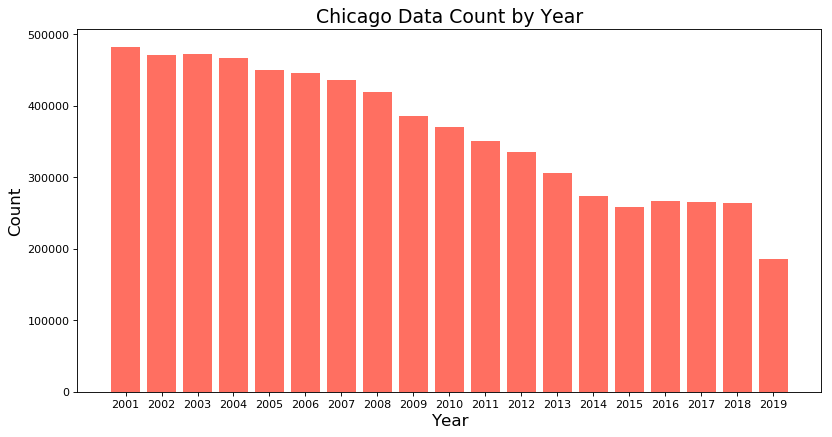

In [18]:
plt.figure(figsize=(12,6), dpi=80)
plt.xlabel('Year', size = 15)
plt.ylabel('Count',  size = 15)
plt.title('Chicago Data Count by Year', size = 17)
plt.bar(pd_year_count['Year'],pd_year_count['Count'], color = "#ff6f61")
plt.show()

# 년도별 데이터 분류

* Month, Day 추가

In [15]:
# tmp = spark.sql("SELECT *, SUBSTR(Date,0,2) AS Month, SUBSTR(Date,4,4) AS Day FROM CHICAGO")

In [24]:
# 복사
chicago_md = chicago

[Pyspark alter column with substring](https://stackoverflow.com/questions/46750201/pyspark-alter-column-with-substring?rq=1)

In [25]:
chicago_md = chicago_md.withColumn('Month', chicago_md['Date'].substr(1,2))
chicago_md = chicago_md.withColumn('Day', chicago_md['Date'].substr(4,2))

In [26]:
chicago_md = chicago_md.withColumn('Time', chicago_md['Date'].substr(12,15))

In [27]:
chicago_md.createOrReplaceTempView("CHICAGO_MD")

* Column 명칭 변경

In [89]:
chicago_md_rename = chicago_md.select('ID',col("Case Number").alias("Case_Number"), 'Date','Block','IUCR',
                                      col("Primary Type").alias("Primary_Type"),'Description',
                                      col("Location Description").alias("Location_Description"), 
                                      'Arrest','Domestic','Beat','District','Ward',
                                      col("Community Area").alias("Community_Area"),
                                      col("FBI Code").alias("FBI_Code"),
                                     col("X Coordinate").alias("X_Coordinate"),col("Y Coordinate").alias("Y_Coordinate"),
                                      col("Updated On").alias("Updated_On"),'Latitude','Longitude','Location',
                                     col("Historical Wards 2003-2015").alias("Historical_Wards_20032015"),
                                     col("Zip Codes").alias("Zip_Codes"),col("Community Areas").alias("Community_Areas"),
                                     col("Census Tracts").alias("Census_Tracts"), 'Wards',
                                      col("Boundaries - ZIP Codes").alias("Boundaries_ZIPCodes"),
                                     col("Police Districts").alias("Police_Districts"), col("Police Beats").alias("Police_Beats"),
                                      'Year','Month', 'Day','Time')

In [92]:
len(chicago_md.columns)

33

In [91]:
len(chicago_md_rename.columns)

33

In [93]:
chicago_md_rename.createOrReplaceTempView("CHICAGO_MD_RE")

* 년도별 분류

In [28]:
year_lst = list(year_count.select('Year').toPandas()['Year'])

In [186]:
yearlst = []
for i in range(len(year_lst)):
#     print(year_lst[i])
    tmp = spark.sql("SELECT * FROM CHICAGO_MD_RE WHERE Year = {}".format(year_lst[i]))
    yearlst.append(tmp)

# SQL 계산 - 월별 평균

* 월별 전체 범죄량 카운트

In [30]:
month_count = spark.sql("SELECT Month, count(Month) AS Count FROM CHICAGO_MD GROUP BY Month ORDER BY Month")

In [59]:
month_count.show()

+-----+------+
|Month| Count|
+-----+------+
|   01|540355|
|   02|477165|
|   03|572889|
|   04|574849|
|   05|622689|
|   06|618456|
|   07|650103|
|   08|642811|
|   09|594328|
|   10|586634|
|   11|527857|
|   12|499027|
+-----+------+



In [60]:
pd_month_count = month_count.toPandas()

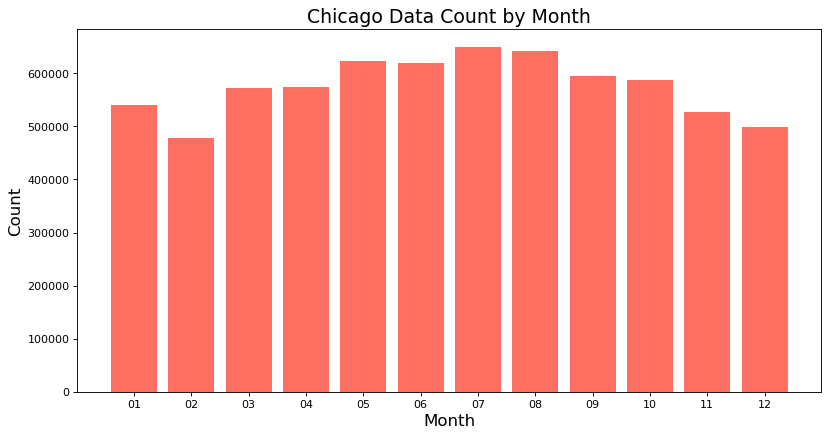

In [72]:
plt.figure(figsize=(12,6), dpi=80)
plt.xlabel('Month', size = 15)
plt.ylabel('Count',  size = 15)
plt.title('Chicago Data Count by Month', size = 17)
plt.bar(pd_month_count['Month'],pd_month_count['Count'], color = "#ff6f61")
plt.show()

* 월별 평균 카운트

In [83]:
month_avg = spark.sql("SELECT Month, count(Month)/12 AS Avg FROM CHICAGO_MD GROUP BY Month ORDER BY Month")

In [84]:
pd_month_avg = month_avg.toPandas()

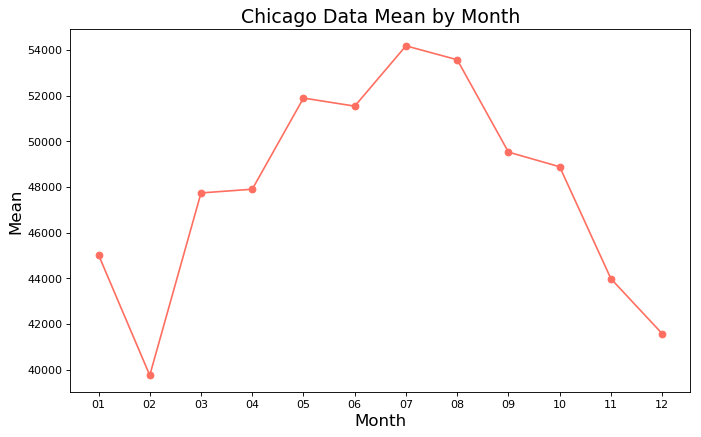

In [85]:
plt.figure(figsize=(10,6), dpi=80)
plt.xlabel('Month', size = 15)
plt.ylabel('Mean',  size = 15)
plt.title('Chicago Data Mean by Month', size = 17)
plt.plot(pd_month_avg['Month'],pd_month_avg['Avg'],color='#ff6f61',marker='o',linestyle='solid')
plt.show()

* 각 년도/월별 범죄량 카운트

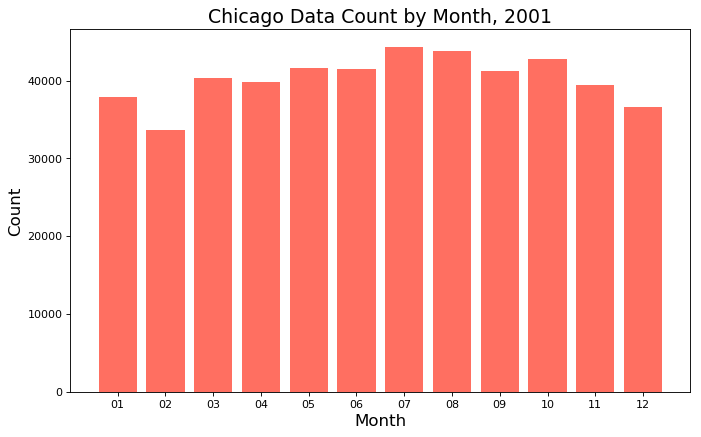

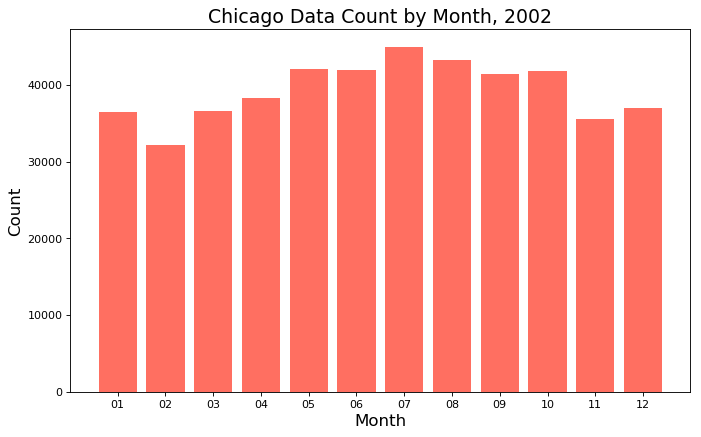

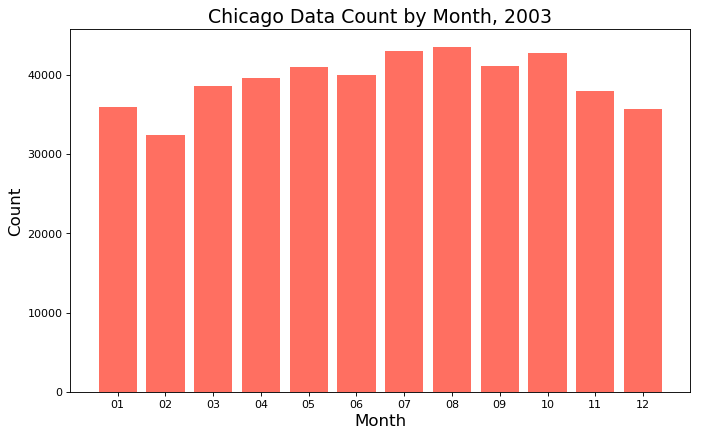

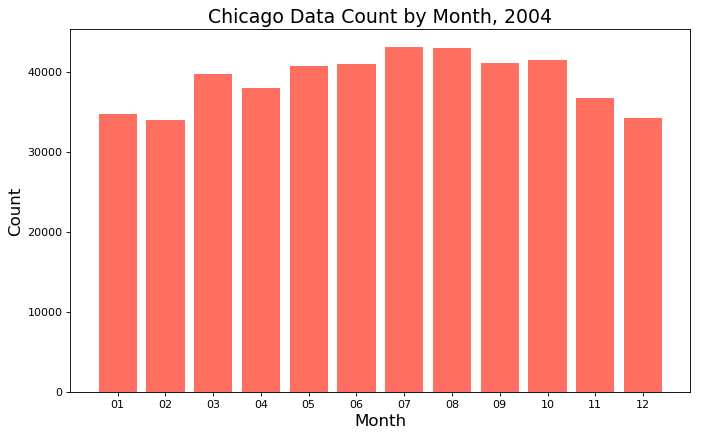

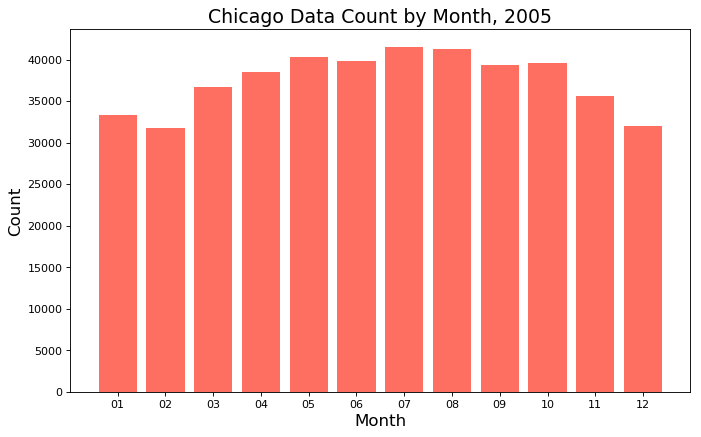

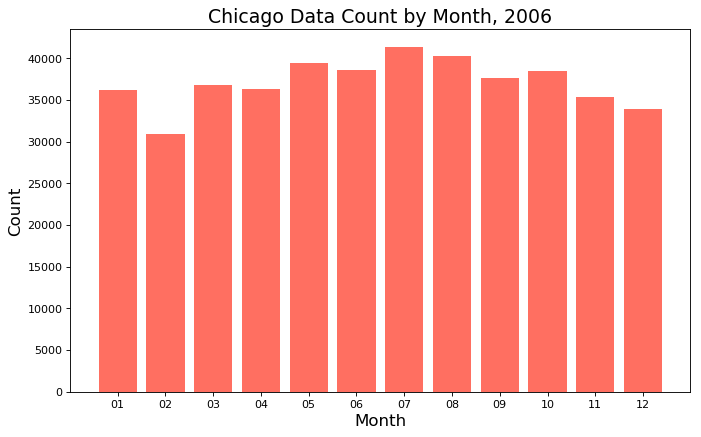

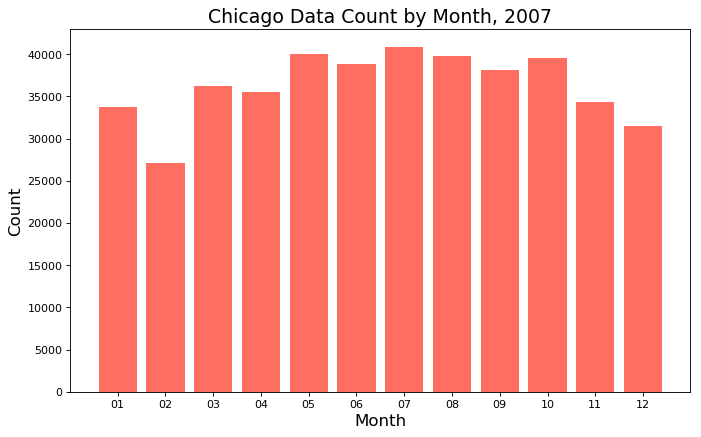

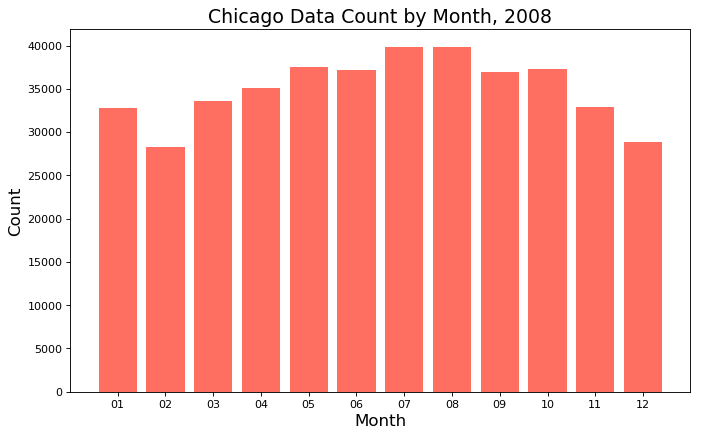

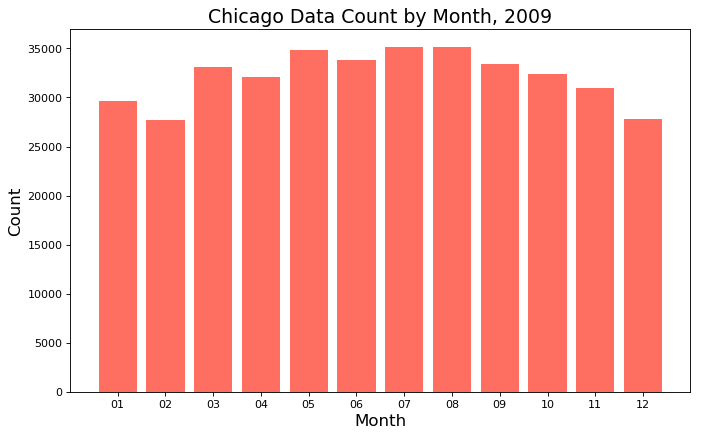

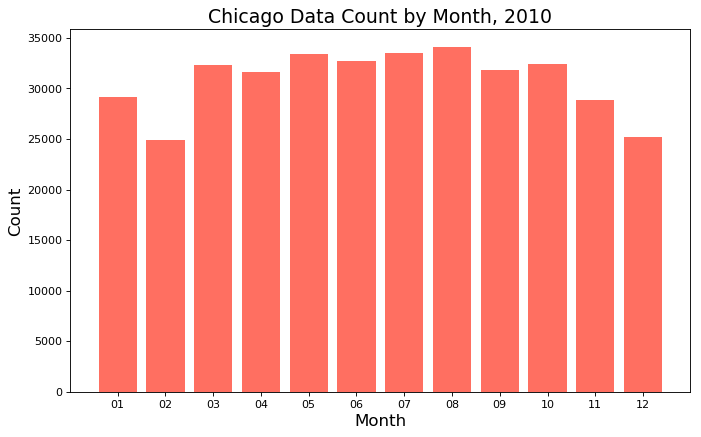

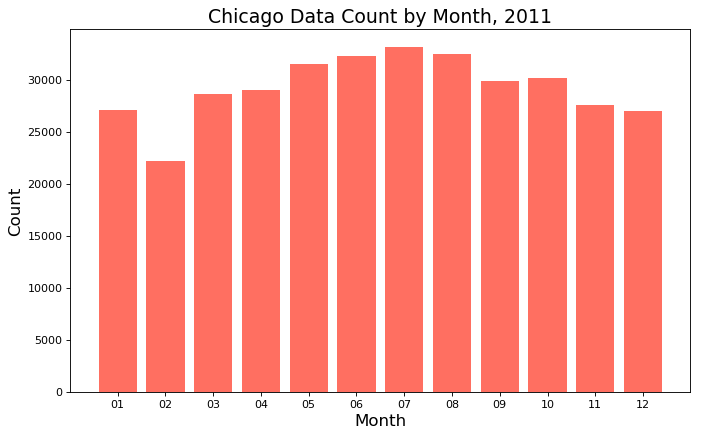

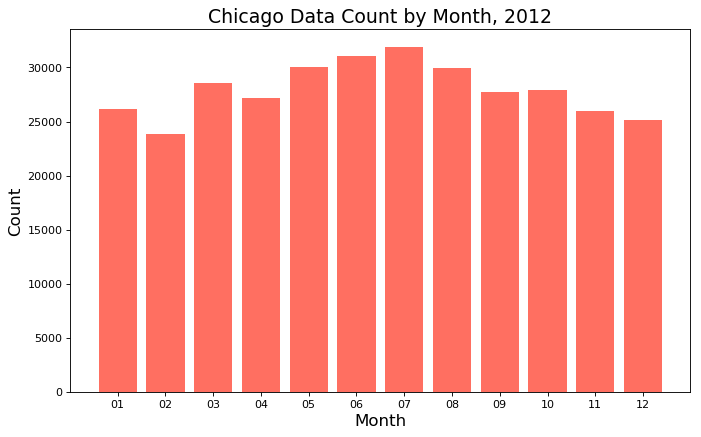

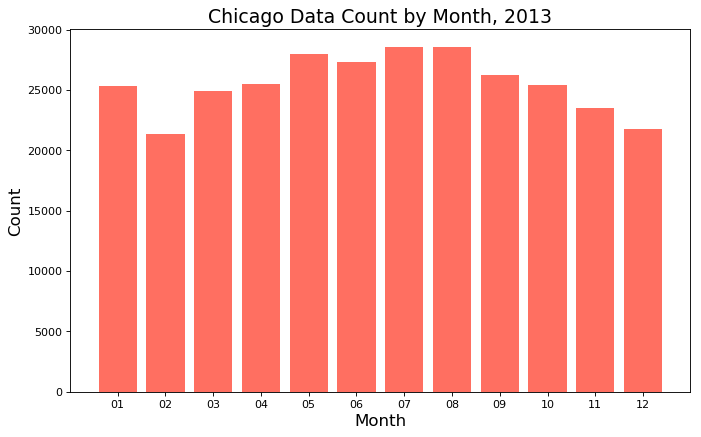

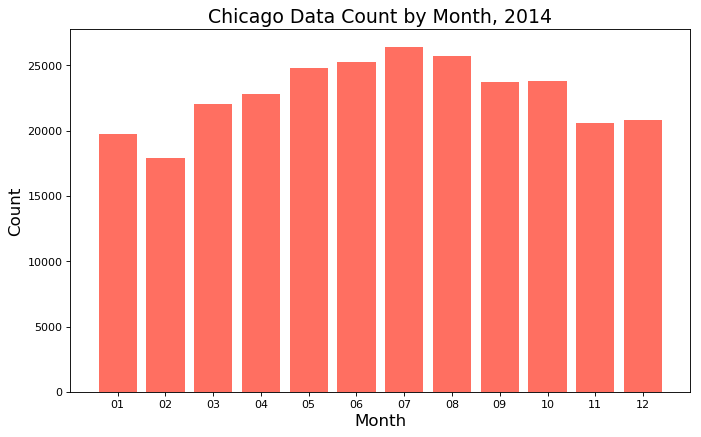

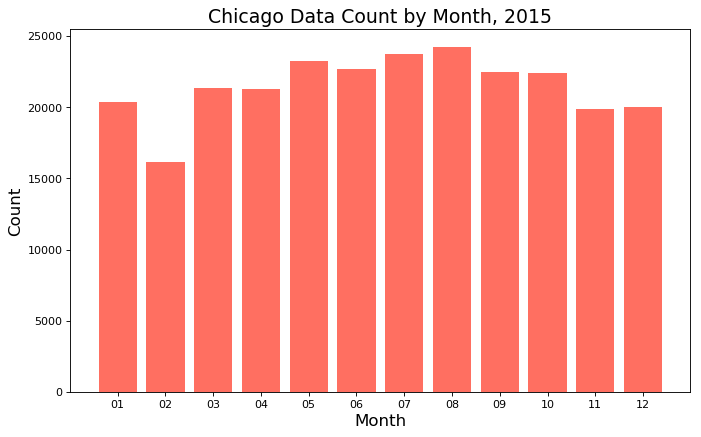

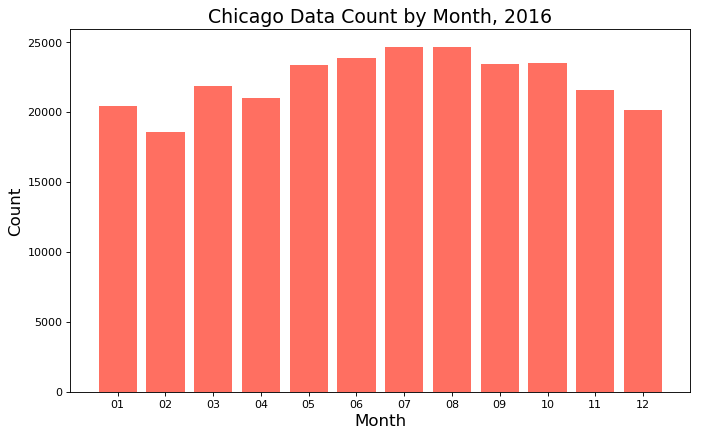

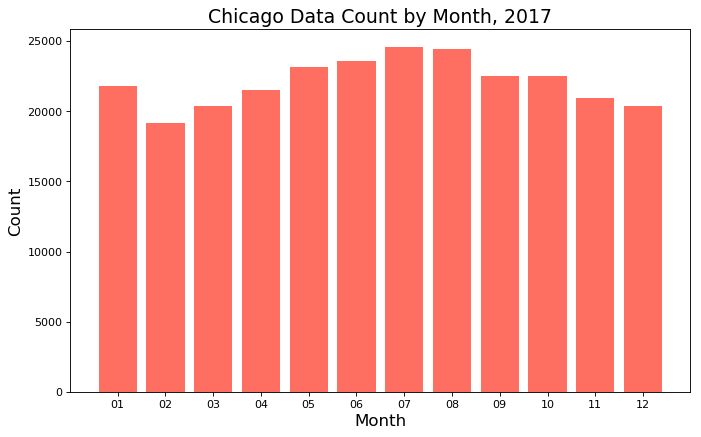

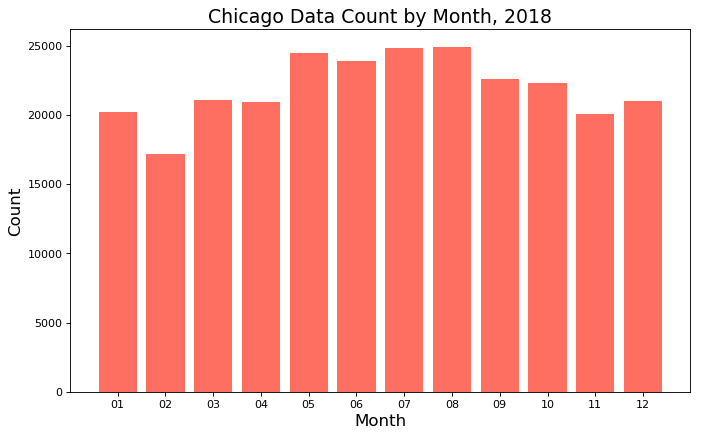

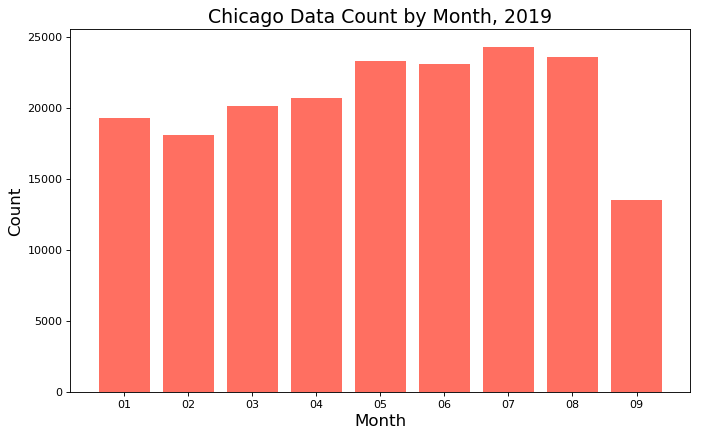

In [79]:
for i in range(len(yearlst)):
    print(year)
    yearlst[i].createOrReplaceTempView("TMP")
    tmp = spark.sql("SELECT Month, count(Month) AS Count FROM TMP GROUP BY Month ORDER BY Month")
    tmpmonchi = tmp.toPandas()
    plt.figure(figsize=(10,6), dpi=80)
    plt.xlabel('Month', size = 15)
    plt.ylabel('Count',  size = 15)
    plt.title('Chicago Data Count by Month, ' + year, size = 17)
    plt.bar(tmpmonchi['Month'],tmpmonchi['Count'], color = "#ff6f61")
    plt.show()

* 16-17 년도 범죄 데이터 테이블 생성

In [187]:
crime1617 = yearlst[15].union(yearlst[16])

In [188]:
crime1617.show()

+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+--------------------+------------+-------------+--------------------+-------------------------+---------+---------------+-------------+-----+-------------------+----------------+------------+----+-----+---+-----------+
|      ID|Case_Number|                Date|               Block|IUCR|        Primary_Type|         Description|Location_Description|Arrest|Domestic|Beat|District|Ward|Community_Area|FBI_Code|X_Coordinate|Y_Coordinate|          Updated_On|    Latitude|    Longitude|            Location|Historical_Wards_20032015|Zip_Codes|Community_Areas|Census_Tracts|Wards|Boundaries_ZIPCodes|Police_Districts|Police_Beats|Year|Month|Day|       Time|
+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+-----------------

# ---------------------------------------------------------------------------------------------------------

# 특정 범죄가 전체 범죄에서 차지하는 비율

* 범죄별 카운트

In [37]:
crime_count = spark.sql("SELECT IUCR, count(IUCR) AS Count FROM CHICAGO_MD GROUP BY IUCR ORDER BY Count")

In [38]:
pd_crime_count = crime_count.toPandas()

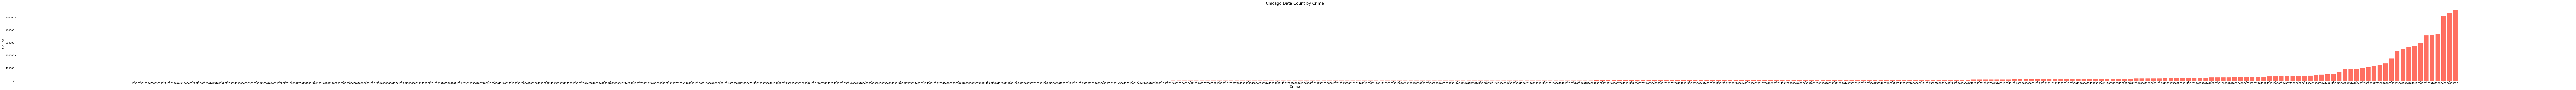

In [39]:
plt.figure(figsize=(200,6), dpi=80)
plt.xlabel('Crime', size = 15)
plt.ylabel('Count',  size = 15)
plt.title('Chicago Data Count by Crime', size = 17)
plt.bar(pd_crime_count['IUCR'],pd_crime_count['Count'], color = "#ff6f61")
plt.show()

* Primary_Type, Count

In [102]:
crime_pri_info = spark.sql("SELECT Primary_Type, count(*) AS Count FROM CHICAGO_MD_RE GROUP BY Primary_Type ORDER BY Count DESC")

In [103]:
crime_pri_info.show()

+--------------------+-------+
|        Primary_Type|  Count|
+--------------------+-------+
|               THEFT|1455483|
|             BATTERY|1269382|
|     CRIMINAL DAMAGE| 790677|
|           NARCOTICS| 713417|
|             ASSAULT| 434372|
|       OTHER OFFENSE| 429951|
|            BURGLARY| 394888|
| MOTOR VEHICLE THEFT| 319064|
|  DECEPTIVE PRACTICE| 268260|
|             ROBBERY| 261155|
|   CRIMINAL TRESPASS| 198262|
|   WEAPONS VIOLATION|  75675|
|        PROSTITUTION|  68259|
|PUBLIC PEACE VIOL...|  48908|
|OFFENSE INVOLVING...|  45052|
| CRIM SEXUAL ASSAULT|  27116|
|         SEX OFFENSE|  24961|
|INTERFERENCE WITH...|  16408|
|            GAMBLING|  14445|
|LIQUOR LAW VIOLATION|  14125|
+--------------------+-------+
only showing top 20 rows



In [104]:
pd_crime_pri_info = crime_pri_info.toPandas()

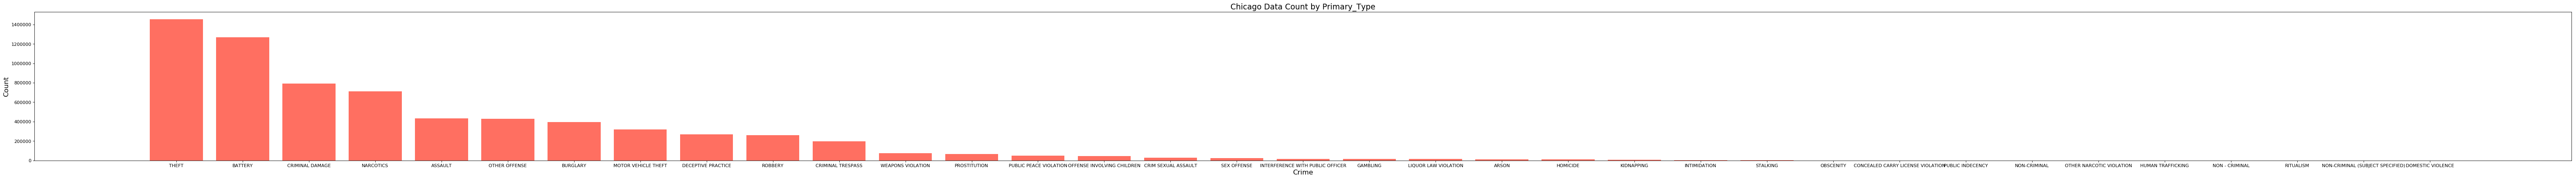

In [109]:
plt.figure(figsize=(100,6), dpi=80)
plt.xlabel('Crime', size = 15)
plt.ylabel('Count',  size = 15)
plt.title('Chicago Data Count by Primary_Type', size = 17)
plt.bar(pd_crime_pri_info['Primary_Type'],pd_crime_pri_info['Count'], color = "#ff6f61")
plt.show()

* IUCR, Primary_Type, Count

[SQL문 사용 안하고 Count 하는 법](https://codeday.me/ko/qa/20190411/301477.html)

In [100]:
crime_info = spark.sql("SELECT IUCR, Primary_Type, count(IUCR) AS Count FROM CHICAGO_MD_RE GROUP BY IUCR, Primary_Type ORDER BY Count DESC")

In [101]:
crime_info.show()

+----+-------------------+------+
|IUCR|       Primary_Type| Count|
+----+-------------------+------+
|0820|              THEFT|562400|
|0486|            BATTERY|536398|
|0460|            BATTERY|513840|
|1320|    CRIMINAL DAMAGE|371204|
|1310|    CRIMINAL DAMAGE|364435|
|0810|              THEFT|357453|
|0560|            ASSAULT|301128|
|1811|          NARCOTICS|275696|
|0610|           BURGLARY|266827|
|0910|MOTOR VEHICLE THEFT|250686|
|0890|              THEFT|234141|
|0860|              THEFT|175930|
|2820|      OTHER OFFENSE|136867|
|1330|  CRIMINAL TRESPASS|122725|
|2027|          NARCOTICS|118967|
|0620|           BURGLARY|105479|
|2825|      OTHER OFFENSE|101767|
|2024|          NARCOTICS| 93158|
|031A|            ROBBERY| 92423|
|0320|            ROBBERY| 90619|
+----+-------------------+------+
only showing top 20 rows



In [98]:
crime_detail_info = spark.sql("SELECT IUCR,Primary_Type,Description, count(IUCR) AS Count FROM CHICAGO_MD_RE GROUP BY IUCR,Primary_Type,Description ORDER BY Count DESC")

In [95]:
crime_detail_info.show()

+----+-------------------+--------------------+------+
|IUCR|       Primary_Type|         Description| Count|
+----+-------------------+--------------------+------+
|0820|              THEFT|      $500 AND UNDER|562385|
|0486|            BATTERY|DOMESTIC BATTERY ...|536398|
|0460|            BATTERY|              SIMPLE|513840|
|1320|    CRIMINAL DAMAGE|          TO VEHICLE|371204|
|1310|    CRIMINAL DAMAGE|         TO PROPERTY|364435|
|0810|              THEFT|           OVER $500|357440|
|0560|            ASSAULT|              SIMPLE|301128|
|1811|          NARCOTICS|POSS: CANNABIS 30...|275696|
|0610|           BURGLARY|      FORCIBLE ENTRY|266827|
|0910|MOTOR VEHICLE THEFT|          AUTOMOBILE|250686|
|0890|              THEFT|       FROM BUILDING|234141|
|0860|              THEFT|        RETAIL THEFT|175930|
|2820|      OTHER OFFENSE|    TELEPHONE THREAT|136867|
|1330|  CRIMINAL TRESPASS|             TO LAND|122725|
|2027|          NARCOTICS|         POSS: CRACK|118967|
|0620|    

In [96]:
crime_detail_info.count()

404

# ===========================================================

# 학교 

* 파일 불러오기

In [40]:
school = spark.read.csv("./school_profile.csv", header=True)

In [126]:
school_uniq = school.distinct()

In [127]:
print(school.count())
print(school_uniq.count())

1983
661


In [135]:
school.sort(col("School_ID")).show()

+---------+--------------------+--------------------+----------+--------------+----------------+--------------------+-------------+-----------------+-----------------------+------------------+------------------+------------------+-------------------+------------------------+-------------------+----------------------+-------------------+-------------------+-----------------------------+-----------------------------+------------------------------------+-------------------+---------------------------------------+----+
|School_ID|          Short_Name|           Long_Name|Dress_Code|Is_High_School|Is_Middle_School|Is_Elementary_School|Is_Pre_School|     School_Hours|Freshman_Start_End_Time|After_School_Hours|   School_Latitude|  School_Longitude|Student_Count_Total|Student_Count_Low_Income|Student_Count_Black|Student_Count_Hispanic|Student_Count_White|Student_Count_Asian|Student_Count_Native_American|Student_Count_Other_Ethnicity|Student_Count_Asian_Pacific_Islander|Student_Count_Multi|Stud

* CSV 저장

In [134]:
# school_uniq.toPandas().to_csv('school_profile_unique2.csv',index=False)

* School_ID, School_Latitude, School_Longitude

In [171]:
school_loc = school_uniq.select("School_ID","School_Latitude","School_Longitude")

# 방과 후 시간 언제부터? 그거랑 관련이 있는가?(전처리 복잡)

* 방과 후 시간 있는 학교만 추리기

In [138]:
aft_school = school_uniq

In [139]:
aft_school = aft_school.na.drop(subset = ["After_School_Hours"])

In [136]:
aft_school.count()

828

In [141]:
aft_school.count()

276

In [148]:
pd_aft_school = aft_school.toPandas()

In [192]:
# pd_aft_school.to_csv('school_aftschool_unique.csv',index=False)

- School_ID, School_Hours, After_School_Hours 만을 가진 테이블 생성

In [149]:
only_aft_school = aft_school.select('School_ID','School_Hours','After_School_Hours')

In [150]:
pd_only_aft_school = only_aft_school.toPandas()

In [151]:
pd_only_aft_school['After_School_Hours'] = pd_only_aft_school['After_School_Hours'].str.upper()
pd_only_aft_school['School_Hours'] = pd_only_aft_school['School_Hours'].str.upper()

In [152]:
pd_only_aft_school['aft_lst'] = pd_only_aft_school['After_School_Hours'].str.split('-')

In [153]:
pd_only_aft_school['sch_lst'] = pd_only_aft_school['School_Hours'].str.split('-')

In [154]:
pd_only_aft_school

,School_ID,School_Hours,After_School_Hours,aft_lst,sch_lst
0,400027,8:00 AM-3:30 PM,3:30 PM-6:00 PM,"[3:30 PM, 6:00 PM]","[8:00 AM, 3:30 PM]"
1,610068,9:00 AM - 4:00 PM,4:00 PM - 5: 30 PM,"[4:00 PM , 5: 30 PM]","[9:00 AM , 4:00 PM]"
2,610198,8:15 AM-3:15 PM,6:00 P.M.,[6:00 P.M.],"[8:15 AM, 3:15 PM]"
3,609774,7:30 AM - 2:30 PM,2:45 PM - 6:30 PM J AT SCHOOL AFTER-CARE PROGRAM,"[2:45 PM , 6:30 PM J AT SCHOOL AFTER, CARE PR...","[7:30 AM , 2:30 PM]"
4,610017,9:00 AM-4:00 PM,4:00 PM - 6:00 PM,"[4:00 PM , 6:00 PM]","[9:00 AM, 4:00 PM]"
5,610251,07:45 AM-02:45 PM,03:00PM -5:00PM,"[03:00PM , 5:00PM]","[07:45 AM, 02:45 PM]"
6,609861,07:45 AM-02:45 PM,NOT AVAILABLE,[NOT AVAILABLE],"[07:45 AM, 02:45 PM]"
7,610256,08:00 AM-03:00 PM,03:00 PM - 06:00 PM,"[03:00 PM , 06:00 PM]","[08:00 AM, 03:00 PM]"
8,610196,08:00 AM-03:00 PM,3:00 PM,[3:00 PM],"[08:00 AM, 03:00 PM]"
9,610299,8:45 AM-3:45 PM,4-6PM,"[4, 6PM]","[8:45 AM, 3:45 PM]"


# 학생들 소득과 범죄율 간의 관계?

* School_ID, Student_Count_Total, Student_Count_Low_Income만 존재하는 테이블

In [156]:
school_income = school_uniq.select('School_ID','Student_Count_Total','Student_Count_Low_Income')

In [157]:
school_income.show()

+---------+-------------------+------------------------+
|School_ID|Student_Count_Total|Student_Count_Low_Income|
+---------+-------------------+------------------------+
|   610010|                308|                     178|
|   400027|                556|                     319|
|   610068|               1479|                    1309|
|   610198|                443|                     397|
|   609856|                609|                     508|
|   609774|                629|                     107|
|   610017|               1009|                     913|
|   609726|                959|                     692|
|   610251|                375|                     320|
|   400143|                 87|                      84|
|   609861|                509|                     225|
|   610256|                119|                      90|
|   610196|                690|                     506|
|   610299|                240|                     209|
|   610316|                239|

* [Divide Pyspark Dataframe Column](https://stackoverflow.com/questions/43287451/divide-pyspark-dataframe-column-by-column-in-other-pyspark-dataframe-when-id-mat)

In [158]:
school_income = school_income.withColumn("Low_Income_Ratio", 
                         (col("Student_Count_Low_Income")/col("Student_Count_Total")))                        

In [159]:
school_income.show()

+---------+-------------------+------------------------+-------------------+
|School_ID|Student_Count_Total|Student_Count_Low_Income|   Low_Income_Ratio|
+---------+-------------------+------------------------+-------------------+
|   610010|                308|                     178|  0.577922077922078|
|   400027|                556|                     319| 0.5737410071942446|
|   610068|               1479|                    1309| 0.8850574712643678|
|   610198|                443|                     397| 0.8961625282167043|
|   609856|                609|                     508| 0.8341543513957307|
|   609774|                629|                     107|0.17011128775834658|
|   610017|               1009|                     913| 0.9048562933597621|
|   609726|                959|                     692|  0.721584984358707|
|   610251|                375|                     320| 0.8533333333333334|
|   400143|                 87|                      84| 0.9655172413793104|

In [163]:
school_income.sort(col("Low_Income_Ratio").desc()).show()

+---------+-------------------+------------------------+------------------+
|School_ID|Student_Count_Total|Student_Count_Low_Income|  Low_Income_Ratio|
+---------+-------------------+------------------------+------------------+
|   610573|                  5|                       5|               1.0|
|   610572|                  4|                       4|               1.0|
|   610499|                256|                     255|        0.99609375|
|   609711|                136|                     135|0.9926470588235294|
|   609768|                 95|                      94|0.9894736842105263|
|   610334|                379|                     374|0.9868073878627969|
|   610245|                103|                     101|0.9805825242718447|
|   400129|                136|                     133|0.9779411764705882|
|   400058|                357|                     349|0.9775910364145658|
|   609723|                343|                     335|0.9766763848396501|
|   610215| 

In [170]:
school_income_ratio = school_income.select("School_ID","Low_Income_Ratio").sort(col("Low_Income_Ratio").desc())

* join

[KEY 중복 없이 JOIN](https://kb.databricks.com/data/join-two-dataframes-duplicated-columns.html)

In [183]:
# key 중복 없이 JOIN 하는 방법

join_school_loc_ratio = school_loc.join(school_income_ratio, ["School_ID"], how = 'left')

In [181]:
join_school_loc_ratio.show()

+---------+------------------+------------------+-------------------+
|School_ID|   School_Latitude|  School_Longitude|   Low_Income_Ratio|
+---------+------------------+------------------+-------------------+
|   610010|41.939246999999995|         -87.67581|  0.577922077922078|
|   400027|         41.950891|        -87.710492| 0.5737410071942446|
|   610068|         41.923955|        -87.761515| 0.8850574712643678|
|   610198|          41.71547|-87.53297099999999| 0.8961625282167043|
|   609856|         41.654558|        -87.544614| 0.8341543513957307|
|   609774|          41.92985|        -87.646413|0.17011128775834658|
|   610017|         41.847941|        -87.697316| 0.9048562933597621|
|   609726|         41.692763|        -87.616353|  0.721584984358707|
|   610251|          41.88295|        -87.699187| 0.8533333333333334|
|   400143|41.890803000000005|        -87.702053| 0.9655172413793104|
|   609861|         41.693026|        -87.680897|0.44204322200392926|
|   610256|         

In [167]:
# pd_school_income = school_income_ratio.toPandas()

In [189]:
# crime1617 활용

In [190]:
# 얘도 반경 잡아야 할 것 같은데? - 반경 잡으면 왜 기준으로 반경 잡았는지까지 타당 이유 찾아봐야 할 듯
# ex) 스쿨존이 ~~였고,, 막 논문 찾아보니 ~~ 반경이 유의미하여.. 등등

In [191]:
# 반경 잡아서 해당 반경 내 범죄율 수와 Income ratio 간의 상관관계 파악해서 후에 모델링 변수로 넣을 지 결정?